# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **BikeIndia** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# 1. Reading and Understanding the Data

In [156]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [157]:
#Import needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

## Understanding Overall Data from CSV

In [158]:
bikesharing = pd.read_csv("day.csv")

In [159]:
bikesharing.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


In [160]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [161]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [162]:
bikesharing.shape

(730, 16)

In [166]:
bikesharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Data Dictionary
    
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Column Type

    
| Column Name | Type |
|-----------|-------------|
| instant | Index |
| dteday | Date |
| temp | Numerical |
| atemp | Numerical |
| hum | Numerical |
| windspeed | Numerical |
| casual | Numerical |
| registered | Numerical |
| season | Categorical |
| yr | Categorical |
| mnth | Categorical |
| holiday | Categorical |
| weekday | Categorical |
| workingday | Categorical |
| weathersit | Categorical |
| cnt | Target |

## Understanding Data in Categorical Columns 

In [167]:
bikesharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [168]:
bikesharing.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [169]:
bikesharing.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [170]:
bikesharing.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [171]:
bikesharing.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [172]:
bikesharing.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [173]:
bikesharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

## Understanding Data in Numerical Columns 

In [174]:
bikesharing.temp.value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

<AxesSubplot:>

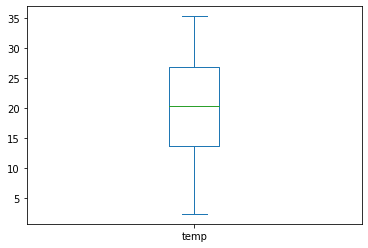

In [175]:
bikesharing.temp.plot.box()

In [176]:
bikesharing.atemp.value_counts()

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

<AxesSubplot:>

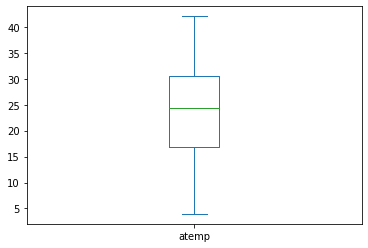

In [177]:
bikesharing.atemp.plot.box()

In [178]:
bikesharing.hum.value_counts()

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

<AxesSubplot:>

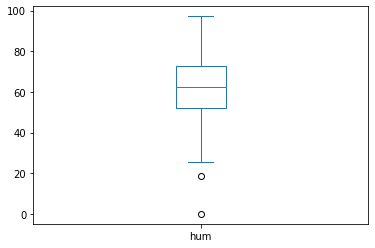

In [179]:
bikesharing.hum.plot.box()

In [180]:
bikesharing.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [181]:
bikesharing[bikesharing.hum <= 20]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,19-02-2018,1,0,2,0,6,0,1,16.365847,19.5702,18.7917,34.000021,532,1103,1635
68,69,10-03-2018,1,0,3,0,4,1,3,15.952731,19.2834,0.0000,17.545759,46,577,623


In [182]:
bikesharing.windspeed.value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

<AxesSubplot:>

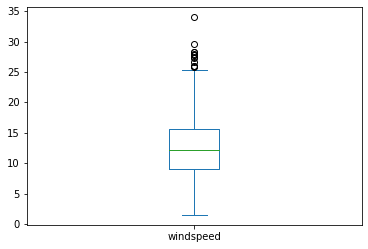

In [183]:
bikesharing.windspeed.plot.box()

In [184]:
bikesharing.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [185]:
bikesharing[bikesharing.windspeed > 26]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,14-02-2018,1,0,2,0,1,1,1,17.015000,19.91750,37.5833,27.999836,208,1705,1913
49,50,19-02-2018,1,0,2,0,6,0,1,16.365847,19.57020,18.7917,34.000021,532,1103,1635
94,95,05-04-2018,2,0,4,0,2,1,2,16.980847,19.91750,64.2083,26.000489,167,1628,1795
292,293,20-10-2018,4,0,10,0,4,1,1,19.509153,23.32625,63.6250,28.292425,471,3724,4195
382,383,18-01-2019,1,1,1,0,3,1,1,12.436653,13.76270,44.3333,27.833743,109,3267,3376
407,408,12-02-2019,1,1,2,0,0,0,1,5.227500,5.08290,46.4583,27.417204,73,1456,1529
420,421,25-02-2019,1,1,2,0,6,0,1,11.924153,12.78375,39.5833,28.250014,317,2415,2732
431,432,08-03-2019,1,1,3,0,4,1,1,21.627500,26.23020,56.7500,29.584721,486,4896,5382
432,433,09-03-2019,1,1,3,0,5,1,2,16.844153,19.85415,40.7083,27.791600,447,4122,4569
665,666,28-10-2019,4,1,10,0,0,0,2,19.577500,23.38855,69.4583,26.666536,998,3461,4459


In [186]:
bikesharing.casual.value_counts()

120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64

<AxesSubplot:>

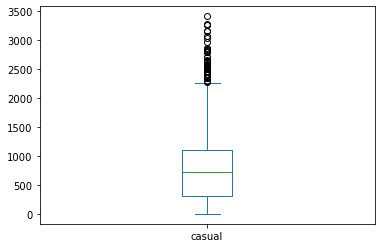

In [187]:
bikesharing.casual.plot.box()

In [188]:
bikesharing.registered.value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64

<AxesSubplot:>

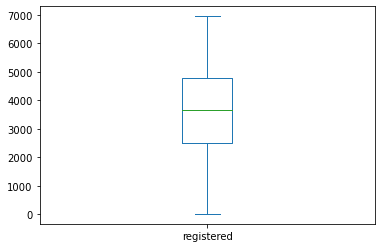

In [189]:
bikesharing.registered.plot.box()

## Visualizing Numeric Variables

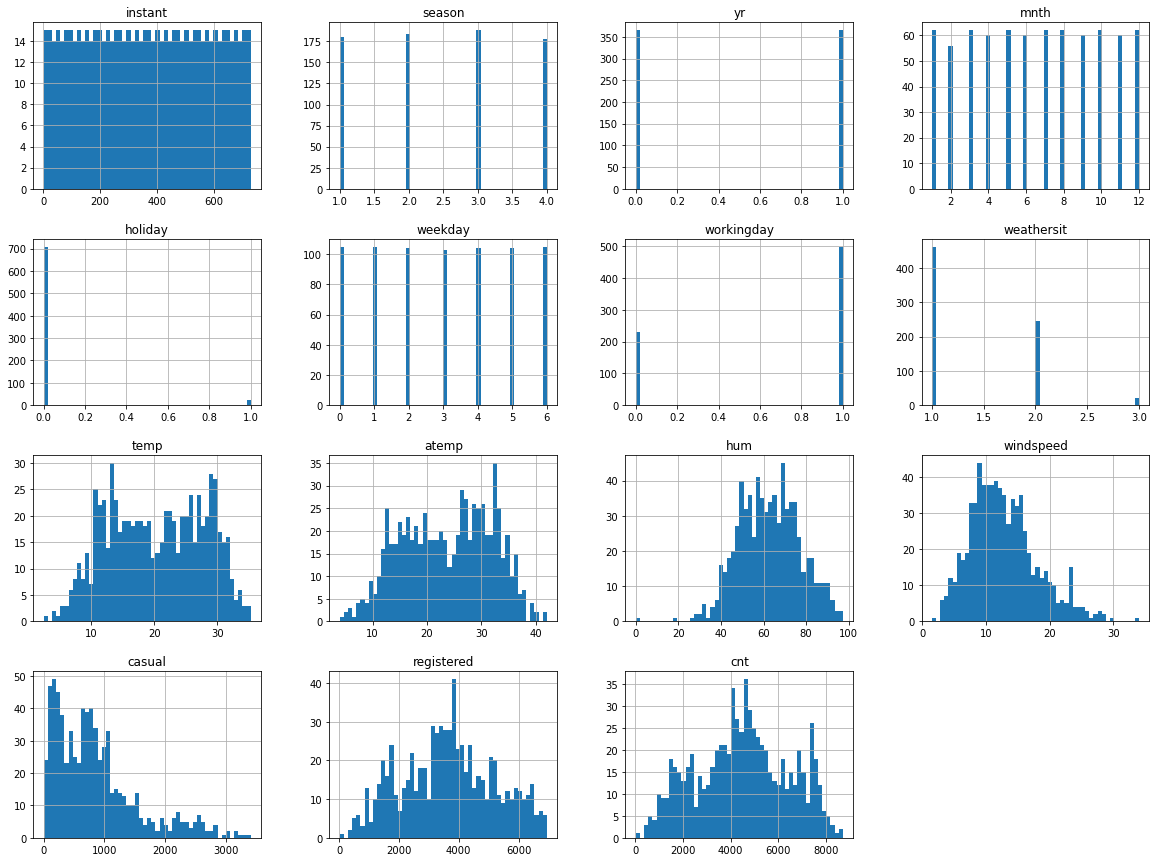

In [190]:
bikesharing.hist(bins=50, figsize=(20,15))
plt.show()

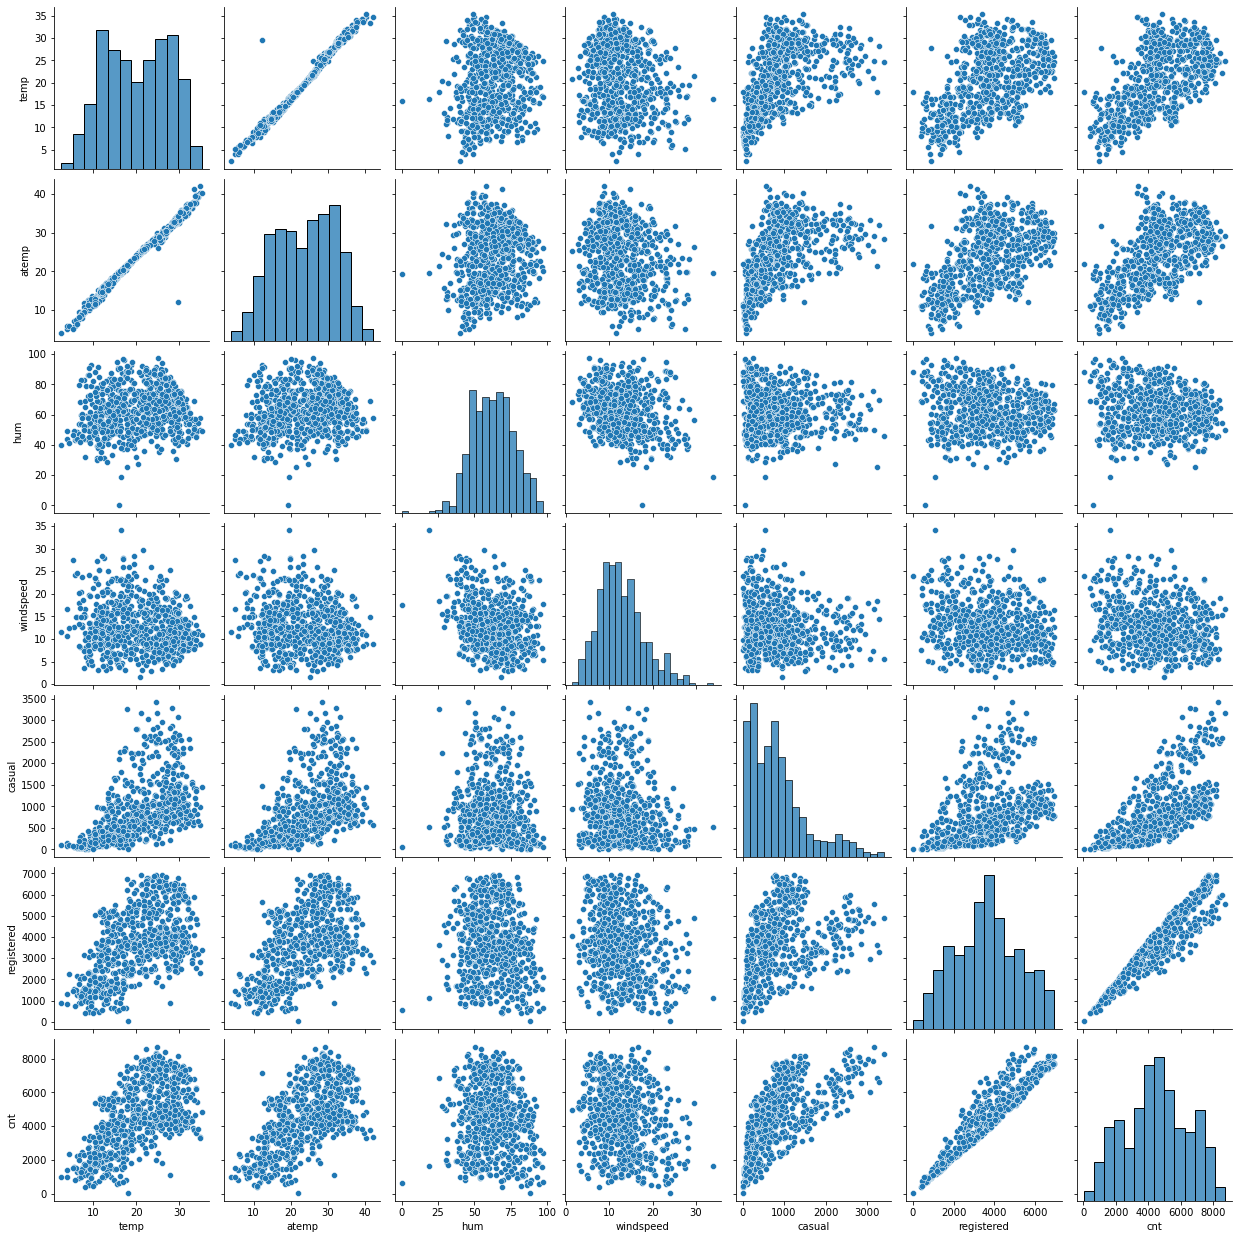

In [191]:
sns.pairplot(bikesharing,  x_vars=["temp","atemp","hum","windspeed","casual","registered","cnt"],y_vars=["temp","atemp","hum","windspeed","casual","registered","cnt"])


## Visualizing Categorical Variables

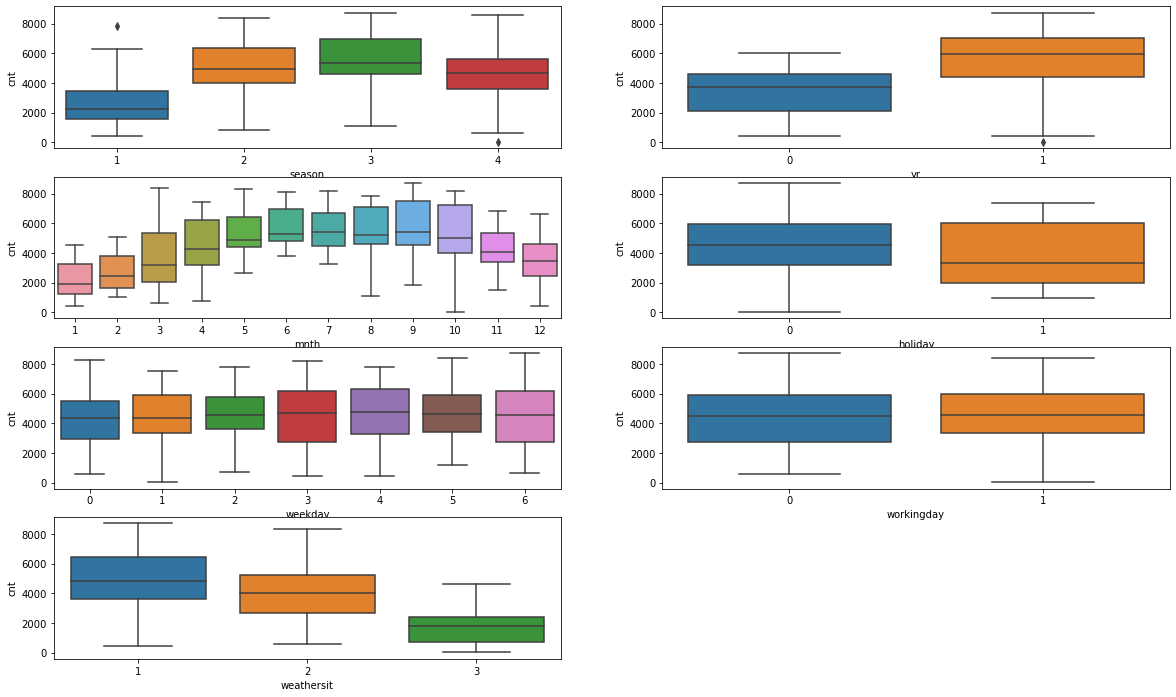

In [193]:
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)


plt.show()

## Observations

 <font color="red"><b>1. "instant" column:</b></font>  index column and it can be dropped<br>
 <font color="red"><b>2. "dteday" column:</b></font>  As month and Year already exists, this column can be dropped<br>
 <font color="green"><b>3. "temp" column:</b></font> Numerical column <br>
 <font color="green"><b>4. "atemp" column:</b></font> Numerical column <br>
 <font color="green"><b>5. "hum" column:</b></font> Numerical column <br>
 <font color="green"><b>6. "windspeed" column:</b></font> Numerical column <br>
 <font color="red"><b>7. "casual" column:</b></font> cnt column include this variable and that is the target column, this column can be dropped <br>
 <font color="red"><b>8. "registered" column:</b></font> cnt column include this variable and that is the target column, this column can be dropped <br>
 <font color="red"><b>9. "season" column:</b></font> Categorical column,  need to change the values "1" to spring, "2" to summer, "3" to fall, "4" to winter, and then pivot these categories to columns with 1 or 0 values<br>
 <font color="green"><b>10. "yr" column:</b></font>  Categorical column <br>
 <font color="red"><b>11. "mnth" column:</b></font>  Categorical column, need to change the values "1" to "Jan", "2" to "Feb".... and "12" to "Dec", and then pivot these categories to columns with 1 or 0 values<br>
 <font color="green"><b>12. "holiday" column:</b></font> Categorical column <br>
 <font color="red"><b>13. "weekday" column:</b></font> Categorical column, need to change the values "0" to "Sun", "1" to "Mon"..."6"to "Sat", and then pivot these categories to columns with 1 or 0 values<br>
 <font color="green"><b>14. "workingday" column:</b></font> Categorical column <br>
 <font color="red"><b>15. "weathersit" column:</b></font> Categorical column, need to change the values 1 to 4 with , weather names, and then pivot these categories to columns with 1 or 0 values<br>
 <font color="orange"><b>16. "cnt" column:</b></font> Target Variable <br>

# 2. Data Preparation

In [852]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [853]:
bikesharing.shape

(730, 16)

* ### <font color="green"> Drop all the columns that are not needed for the analysis </font>

* ###  <font color=red> Index, dteday, casual and registered column can be dropped by creating a new dataframe without these columns </font>



In [854]:
bikeshare_df=bikesharing[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [855]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


* ####  <font color="red"> "season" column: Categorical column, need to change the values "1" to spring, "2" to summer, "3" to fall, "4" to winter, and then pivot these categories to columns with 1 or 0 values </font>

In [216]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season details'
season_details = pd.get_dummies(bikeshare_df['season'], drop_first = True)

In [217]:
season_details.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


##### Change column names

In [856]:
season_details.columns = ["summer", "fall", "winter"]

In [857]:
season_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   summer  730 non-null    uint8
 1   fall    730 non-null    uint8
 2   winter  730 non-null    uint8
dtypes: uint8(3)
memory usage: 2.3 KB


In [858]:
bikeshare_df = pd.concat([bikeshare_df, season_details], axis = 1)

In [859]:
bikeshare_df = bikeshare_df.drop(columns=["season"])

In [860]:
bikeshare_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


* ####  <font color="red"> "mnth" column: Categorical column, need to change the values "1" to "Jan", "2" to "Feb".... and "12" to "Dec", and then pivot these categories to columns with 1 or 0 values </font>

In [861]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season details'
month_details = pd.get_dummies(bikeshare_df['mnth'], drop_first = True)

In [862]:
month_details.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


##### Change column names

In [863]:
month_details.columns = ["feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

In [864]:
month_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   feb     730 non-null    uint8
 1   mar     730 non-null    uint8
 2   apr     730 non-null    uint8
 3   may     730 non-null    uint8
 4   jun     730 non-null    uint8
 5   jul     730 non-null    uint8
 6   aug     730 non-null    uint8
 7   sep     730 non-null    uint8
 8   oct     730 non-null    uint8
 9   nov     730 non-null    uint8
 10  dec     730 non-null    uint8
dtypes: uint8(11)
memory usage: 8.0 KB


In [865]:
bikeshare_df = pd.concat([bikeshare_df, month_details], axis = 1)

In [866]:
bikeshare_df = bikeshare_df.drop(columns=["mnth"])

In [867]:
bikeshare_df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* ####  <font color="red"> "weekday" column: Categorical column, need to change the values "0" to "Sun", "1" to "Mon"..."6"to "Sat", and then pivot these categories to columns with 1 or 0 values </font>

In [868]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season details'
weekday_details = pd.get_dummies(bikeshare_df['weekday'], drop_first = True)

In [869]:
weekday_details.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


##### Change column names

In [870]:
weekday_details.columns = ["mon", "tue", "wed", "thu", "fri", "sat"]

In [871]:
weekday_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mon     730 non-null    uint8
 1   tue     730 non-null    uint8
 2   wed     730 non-null    uint8
 3   thu     730 non-null    uint8
 4   fri     730 non-null    uint8
 5   sat     730 non-null    uint8
dtypes: uint8(6)
memory usage: 4.4 KB


In [872]:
bikeshare_df = pd.concat([bikeshare_df, weekday_details], axis = 1)

In [873]:
bikeshare_df = bikeshare_df.drop(columns=["weekday"])

In [874]:
bikeshare_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


* ####  <font color="red"> "weathersit" column: Categorical column, need to change the values "1" as weathersit_1, "2" as weathersit_2, "3" as weathersit_3 and 4 as weathersit_4 ( but 4 is not available in the given data ), and then pivot these categories to columns with 1 or 0 values </font>

In [875]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season details'
weathersit_details = pd.get_dummies(bikeshare_df['weathersit'], drop_first = True)

In [876]:
weathersit_details.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


##### Change column names

In [877]:
weathersit_details.columns = ["weathersit_2", "weathersit_3"]

In [878]:
weathersit_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   weathersit_2  730 non-null    uint8
 1   weathersit_3  730 non-null    uint8
dtypes: uint8(2)
memory usage: 1.6 KB


In [879]:
bikeshare_df = pd.concat([bikeshare_df, weathersit_details], axis = 1)

In [880]:
bikeshare_df = bikeshare_df.drop(columns=["weathersit"])

# 3. Split the data in to Training set and Testing Set

In [881]:
bikeshare_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [882]:
bikeshare_df.shape

(730, 30)

In [883]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   summer        730 non-null    uint8  
 9   fall          730 non-null    uint8  
 10  winter        730 non-null    uint8  
 11  feb           730 non-null    uint8  
 12  mar           730 non-null    uint8  
 13  apr           730 non-null    uint8  
 14  may           730 non-null    uint8  
 15  jun           730 non-null    uint8  
 16  jul           730 non-null    uint8  
 17  aug           730 non-null    uint8  
 18  sep           730 non-null    

### Split the Data in to Training set and Testing set with 70% and 30% accordingly. 

In [885]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikeshare_train_df, bikeshare_test_df = train_test_split(bikeshare_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [886]:
bikeshare_train_df.shape

(510, 30)

In [887]:
bikeshare_test_df.shape

(219, 30)

In [888]:
bikeshare_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   summer        510 non-null    uint8  
 9   fall          510 non-null    uint8  
 10  winter        510 non-null    uint8  
 11  feb           510 non-null    uint8  
 12  mar           510 non-null    uint8  
 13  apr           510 non-null    uint8  
 14  may           510 non-null    uint8  
 15  jun           510 non-null    uint8  
 16  jul           510 non-null    uint8  
 17  aug           510 non-null    uint8  
 18  sep           510 non-null   

In [889]:
bikeshare_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   summer        219 non-null    uint8  
 9   fall          219 non-null    uint8  
 10  winter        219 non-null    uint8  
 11  feb           219 non-null    uint8  
 12  mar           219 non-null    uint8  
 13  apr           219 non-null    uint8  
 14  may           219 non-null    uint8  
 15  jun           219 non-null    uint8  
 16  jul           219 non-null    uint8  
 17  aug           219 non-null    uint8  
 18  sep           219 non-null   

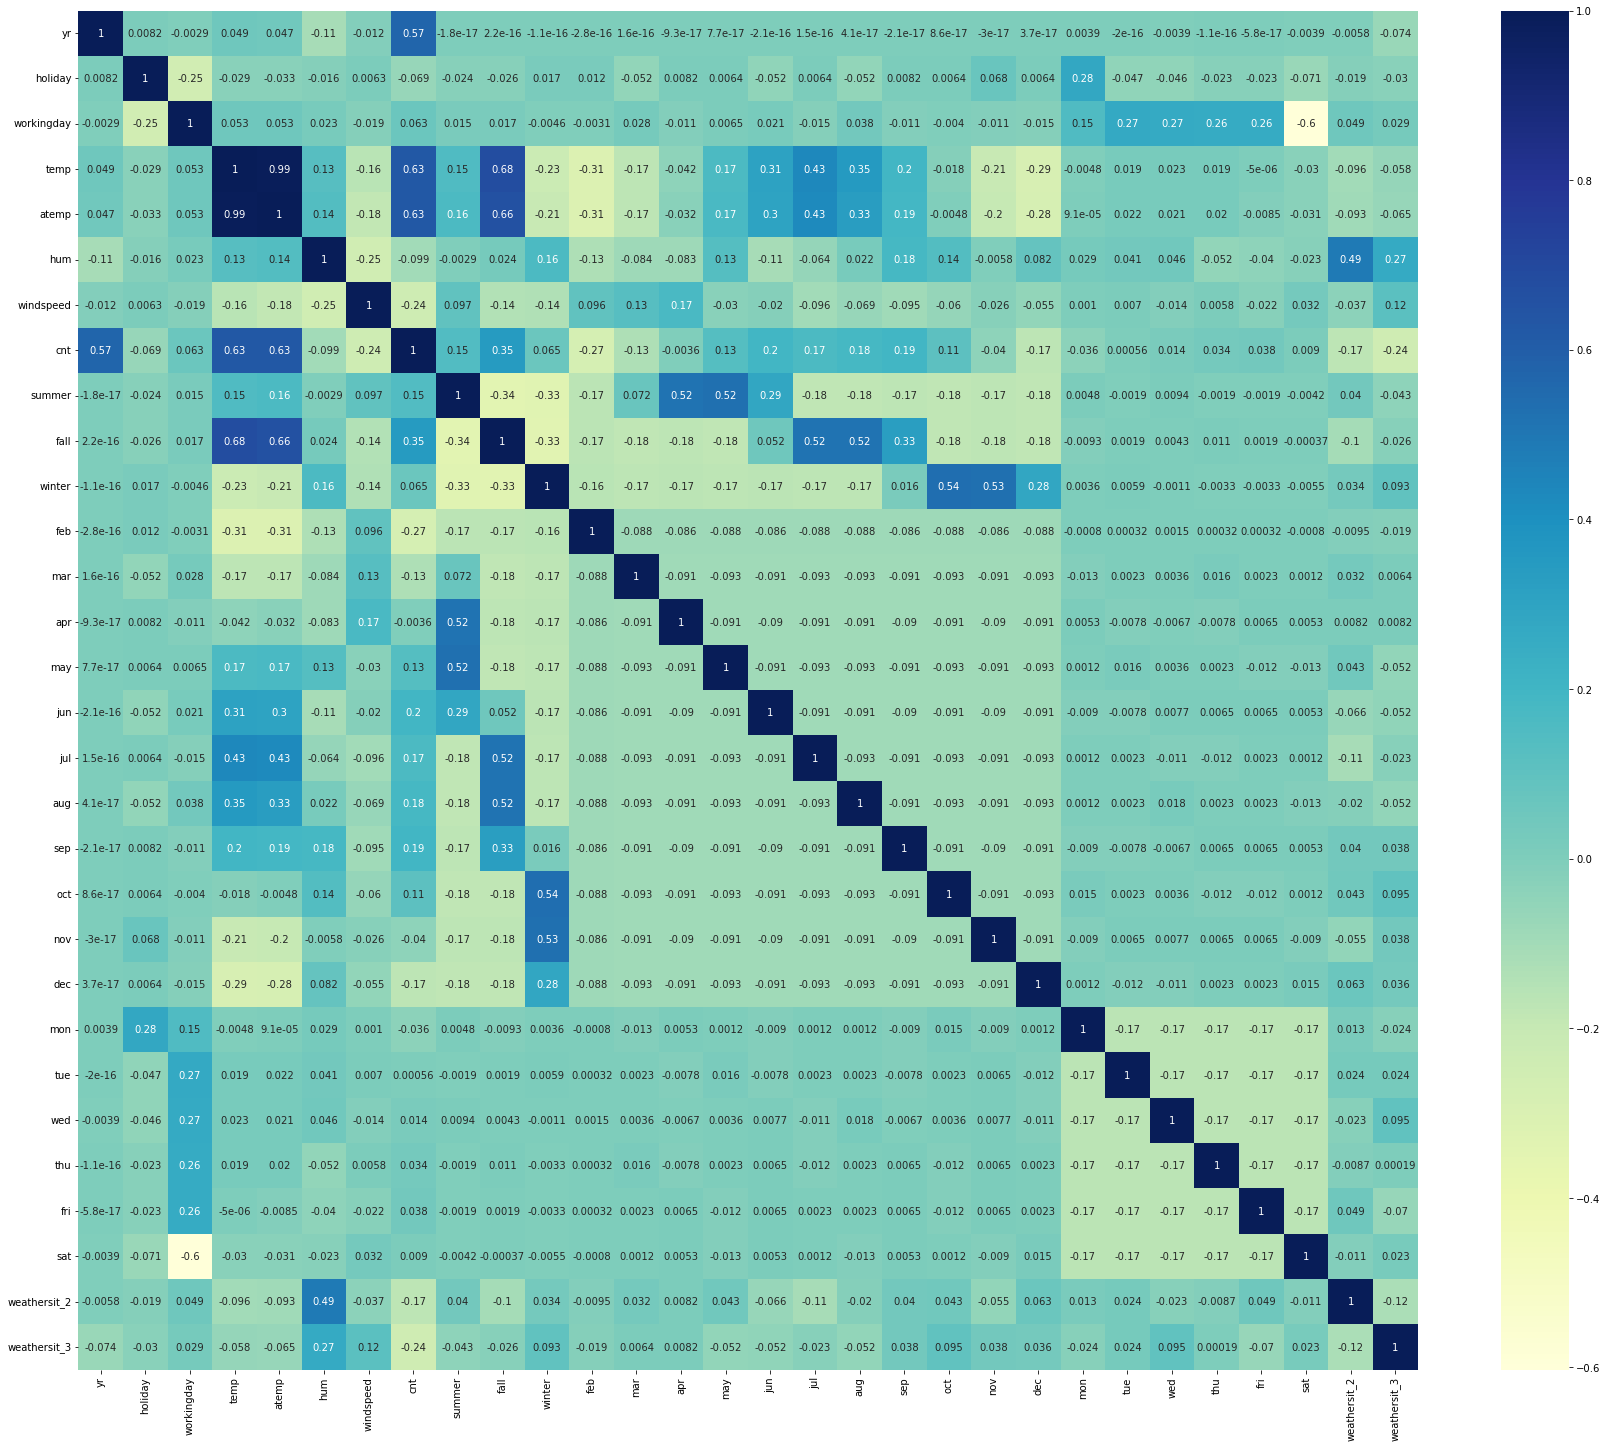

In [890]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bikeshare_df) that were chosen for analysis

plt.figure(figsize = (30,25))
sns.heatmap(bikeshare_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

# 4. Rescaling Data

### Types of Rescaling

There are two types of scaling

1. Min-Max scaling (Normalization : (X - Xmin) / (Xmax - Xmin)
2. Standardisation (mean-0, sigma-1) : (X- XMean)/ Std. Dev.

### Rescaling the Features in the Training Data set using Standardization method

In [891]:
from sklearn.preprocessing import StandardScaler

In [892]:
scaler = StandardScaler()

In [893]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bikeshare_train_df[num_vars] = scaler.fit_transform(bikeshare_train_df[num_vars])

In [894]:
bikeshare_train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,weathersit_2,weathersit_3
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,1.562685,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,1.399629,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,-0.215554,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,-1.379511,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,-0.136589,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [895]:
bikeshare_train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,-2.757054e-16,4.193813e-16,-3.459107e-16,-2.333645e-16,-5.398732e-17,0.245098,0.262745,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.430568,0.440557,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,-2.381246e+00,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Heat map for the scaled data

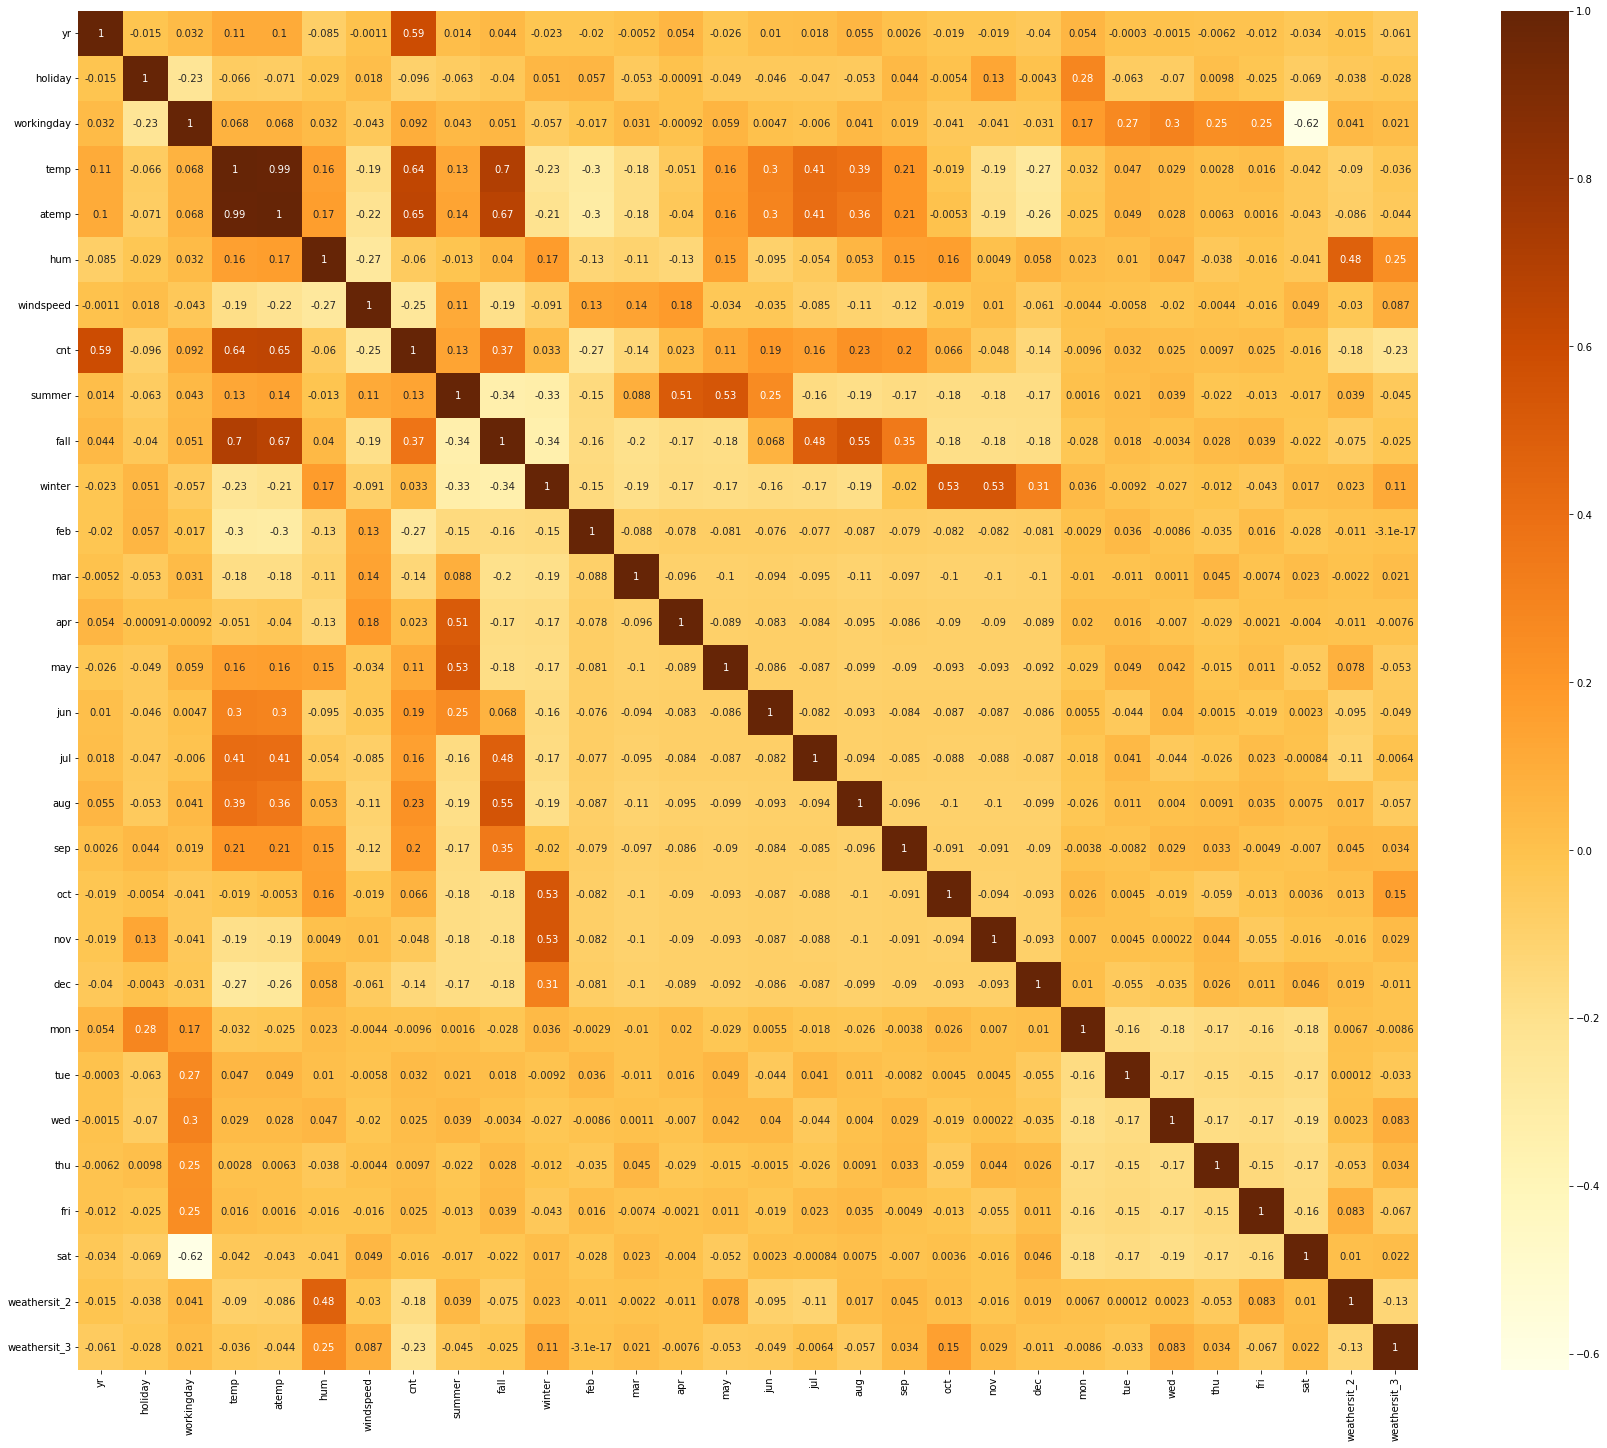

In [900]:
plt.figure(figsize = (30,25))
sns.heatmap(bikeshare_train_df.corr(), annot = True, cmap="YlOrBr")
plt.show()

    
# 5. Build Model

We will start building models 

## 5.1 Build Model Manually [<font color=blue><b> Model 1 </b> </font> ]

1. Start with One variable <font color="red"><b>Simple Linear Regression</b></font> 
2. Start adding two more variables, one by one,  [Forward] to make it a <font color="red"><b>Multiple Linear Regression</b></font>. Check the R2 of the linear regression summary. 
3. Since we have more number of variables, adding one by one is a tedious process, so we will add all the variables and remove one by one [Backward] to find our optimal model
4. Remove features one by one such that the p-value for all the variables are less than 0.05 and VIF of all variables are less than 5.00
5. Do the <font color="red"><b> Residual analysis </b> </font> and check if there is a normalised curve on errors
6. Use the model to <font color="red"><b> Predict the target variable for the Test Data </b> </font>
7. <font color="red"><b> Evaluate </b> </font> the model 
8. Check the <font color="red"><b> R2 score for the predicted Test data </b></font> 

## 5.2 Build Model with RFE [<font color=blue><b> Model 2 </b> </font> ]
1. Do the Variables/ Features selection using the <font color="red"><b>  Recursive Features Elimination [ RFE ] </b> </font>
2. Once we have a list of variables, create a model with those variable and check the p-values and VIF 
3. Remove features one by one such that the p-value for all the variables are less than 0.05 and VIF of all variables are less than 5.00
4. Do the <font color="red"><b> Residual analysis </b> </font> and check if there is a normalised curve on errors
5. Use the model to <font color="red"><b> Predict the target variable for the Test Data </b> </font>
6. <font color="red"><b> Evaluate </b> </font> the model 
7. Check the <font color="red"><b> R2 score for the predicted Test data </b></font> 


## 5.1 Build Model Manually [ <font color="blue"> Model 1 </font> ]

### 5.1.1 Simple Linear Regression
Start with One variable to create a Simple Linear Regression model

####  <font color="red">  `atemp` is highly correlated with the target variable `cnt`, let's plot and check </font>

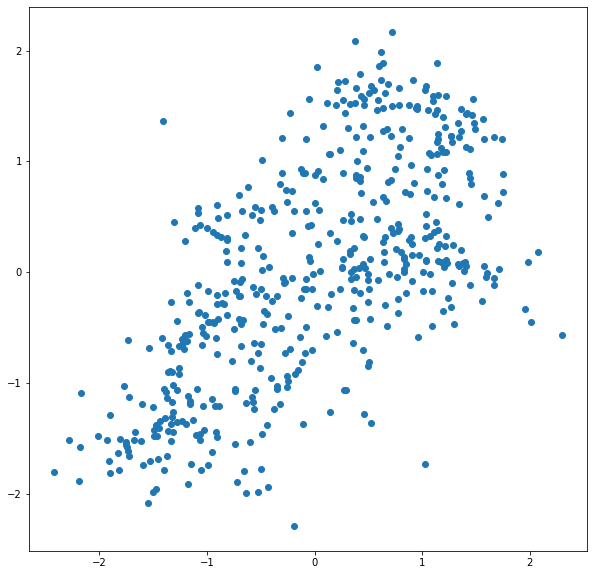

In [901]:
plt.figure(figsize=[10,10])
plt.scatter(bikeshare_train_df.atemp, bikeshare_train_df.cnt)
plt.show()

#### <font color=red> Dividing data frames to X and y for model building </font>

In [902]:
y_train = bikeshare_train_df.pop('cnt')
X_train = bikeshare_train_df

In [903]:
import statsmodels.api as sm

In [904]:
# Add a constant to X_train
X_train_lm = sm.add_constant(X_train[['atemp']])

In [905]:
X_train_lm.head()

,const,atemp
653,1.0,-0.055878
576,1.0,1.194106
426,1.0,-0.348834
728,1.0,-1.473492
482,1.0,-0.571474


In [906]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   const   510 non-null    float64
 1   atemp   510 non-null    float64
dtypes: float64(2)
memory usage: 12.0 KB


In [907]:
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [908]:
# Check the parameters obtained
lr.params

const   -3.989864e-17
atemp    6.464752e-01
dtype: float64

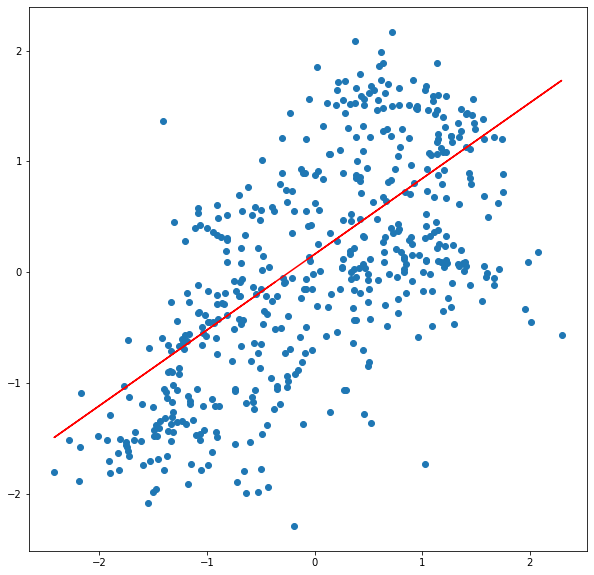

In [909]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize=[10,10])
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.162 + 0.683*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [910]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.10e-61
Time:                        22:57:34   Log-Likelihood:                -585.66
No. Observations:                 510   AIC:                             1175.
Df Residuals:                     508   BIC:                             1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.99e-17      0.034  -1.18e-15      1.0

### 5.1.2 Multiple Linear Regression
Start adding variables, one by one, [Forward] to make a Multiple Linear Regression model. Check the R2 of the linear regression summary.

#### <font color=red> `fall` has second largest correlation with the target variable `cnt` </font>

In [911]:
# Add "fall" to the model and check the R-squared
X_train_lm = X_train[['atemp', 'fall']]

In [912]:
# Build a first linear model
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const    0.066637
atemp    0.721261
fall    -0.253619
dtype: float64

In [913]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     187.2
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.30e-61
Time:                        22:59:59   Log-Likelihood:                -582.64
No. Observations:                 510   AIC:                             1171.
Df Residuals:                     507   BIC:                             1184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0666      0.043      1.542      0.1

### 5.1.3. Adding all the variables to the model

Since we have more number of variables, adding one by one is a tedious process, so we will add all the variables and remove one by one [Backward] to find our optimal model

In [922]:
# Build a 2nd linear model
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const          -1.133363
yr              1.034921
holiday        -0.180894
workingday      0.203613
temp            0.403558
atemp           0.047876
hum            -0.098608
windspeed      -0.139401
summer          0.386838
fall            0.216516
winter          0.686215
feb             0.135442
mar             0.284587
apr             0.278847
may             0.388892
jun             0.271254
jul             0.103795
aug             0.350496
sep             0.643445
oct             0.313142
nov             0.092626
dec             0.075739
mon            -0.052378
tue            -0.042601
wed             0.017903
fri             0.043454
sat             0.243045
weathersit_2   -0.272004
weathersit_3   -1.144068
dtype: float64

### <font color=red> Check p-values are less than 0.05 </font>

In [915]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          8.42e-181
Time:                        23:04:41   Log-Likelihood:                -234.14
No. Observations:                 510   AIC:                             526.3
Df Residuals:                     481   BIC:                             649.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1334      0.103    -11.052   

###  <font color=red> Check VIF is less than 5.00 </font>

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### <font color=red>  $ VIF_i = \frac{1}{1 - {R_i}^2} $ </font>

In [918]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [919]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,thu,inf
25,fri,inf
21,mon,inf
1,holiday,inf
23,wed,inf
22,tue,inf
2,workingday,inf
3,temp,62.26
4,atemp,55.89
8,fall,15.34


### 5.1.4 Remove features to create an optimal Model 
Remove features one by one such that the p-value for all the variables are less than 0.05 and VIF of all variables are less than 5.00

####  <font color=red> Dropping feature `thu` as it has  `p-value: 0.869` and  `VIF: inf`.   </font>

In [920]:
X_train = X_train.drop('thu', 1,)

In [921]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,fri,sat,weathersit_2,weathersit_3
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [923]:
# Build a 3rd fitted model
X_train_lm_1 = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [924]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          8.42e-181
Time:                        23:24:44   Log-Likelihood:                -234.14
No. Observations:                 510   AIC:                             526.3
Df Residuals:                     481   BIC:                             649.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1334      0.103    -11.052   

In [925]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
3,temp,62.26
4,atemp,55.89
8,fall,15.34
9,winter,10.92
2,workingday,8.91
7,summer,8.88
16,aug,7.68
15,jul,6.41
17,sep,5.27
19,nov,5.18


####  <font color=red> Dropping feature `temp` as it is highly correlated with `atemp` and has a high `VIF: 62.26`.   </font>

In [926]:
# Back up of X_train dataset before removing each variable
X_train_temp_1 = X_train
X_train = X_train.drop('temp', 1,)

In [927]:
X_train_temp_1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'summer', 'fall', 'winter', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
       'aug', 'sep', 'oct', 'nov', 'dec', 'mon', 'tue', 'wed', 'fri', 'sat',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [928]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sep', 'oct', 'nov', 'dec', 'mon', 'tue', 'wed', 'fri', 'sat',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [929]:
# Build a 4th fitted model
X_train_lm_2 = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          4.12e-180
Time:                        23:28:27   Log-Likelihood:                -238.33
No. Observations:                 510   AIC:                             532.7
Df Residuals:                     482   BIC:                             651.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.2112      0.099    -12.176   

In [930]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
7,fall,15.29
8,winter,10.92
6,summer,8.88
2,workingday,8.82
15,aug,7.51
14,jul,6.34
16,sep,5.25
18,nov,5.16
17,oct,5.09
12,may,4.68


####  <font color=red> Dropping feature `fall` as it has a high `VIF: 15.29`.   </font>

In [931]:
# Back up of X_train dataset before removing each variable
X_train_temp_2 = X_train
X_train = X_train.drop('fall', 1,)

In [932]:
# Build a 5th fitted model
X_train_lm_3 = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          2.06e-180
Time:                        23:32:46   Log-Likelihood:                -240.09
No. Observations:                 510   AIC:                             534.2
Df Residuals:                     483   BIC:                             648.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.2015      0.100    -12.067   

In [933]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
2,workingday,8.79
7,winter,8.09
6,summer,6.23
17,nov,4.20
16,oct,4.19
11,may,3.88
3,atemp,3.65
10,apr,3.52
12,jun,2.84
18,dec,2.71


####  <font color=red> Dropping feature `workingday` as it has a high `VIF: 8.79`.   </font>

In [934]:
# Back up of X_train dataset before removing each variable
X_train_temp_3 = X_train
X_train = X_train.drop('workingday', 1,)

In [935]:
# Build a 6th fitted model
X_train_lm_4 = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     107.2
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.90e-179
Time:                        23:40:59   Log-Likelihood:                -244.96
No. Observations:                 510   AIC:                             541.9
Df Residuals:                     484   BIC:                             652.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0921      0.094    -11.657   

In [936]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
6,winter,8.08
5,summer,6.23
16,nov,4.04
15,oct,4.04
10,may,3.65
2,atemp,3.48
9,apr,3.39
17,dec,2.58
11,jun,2.58
23,weathersit_2,2.40


####  <font color=red> Dropping feature `winter` as it has a high `VIF: 8.08`.   </font>

In [937]:
# Back up of X_train dataset before removing each variable
X_train_temp_5 = X_train
X_train = X_train.drop('winter', 1,)

In [938]:
# Build a 7th fitted model
X_train_lm_5 = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     103.6
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          9.23e-174
Time:                        23:44:44   Log-Likelihood:                -261.35
No. Observations:                 510   AIC:                             572.7
Df Residuals:                     485   BIC:                             678.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1041      0.097    -11.427   

In [939]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
5,summer,6.23
9,may,3.65
2,atemp,3.48
8,apr,3.39
10,jun,2.58
22,weathersit_2,2.40
11,jul,2.08
12,aug,2.07
3,hum,2.03
0,yr,1.97


####  <font color=red> Dropping feature `summer` as it has a high `VIF: 6.23`.   </font>

In [940]:
# Back up of X_train dataset before removing each variable
X_train_temp_6 = X_train
X_train = X_train.drop('summer', 1,)

In [941]:
# Build a 8th fitted model
X_train_lm_6 = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          7.33e-173
Time:                        23:46:59   Log-Likelihood:                -266.04
No. Observations:                 510   AIC:                             580.1
Df Residuals:                     486   BIC:                             681.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1209      0.097    -11.525   

In [942]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
2,atemp,3.47
21,weathersit_2,2.40
10,jul,2.08
11,aug,2.07
3,hum,2.02
0,yr,1.97
9,jun,1.76
16,mon,1.59
12,sep,1.58
18,wed,1.52


####  <font color=red> Dropping feature `mon` as it has a high `p-value: 0.256`.   </font>

In [943]:
# Back up of X_train dataset before removing each variable
X_train_temp_7 = X_train
X_train = X_train.drop('mon', 1,)

In [944]:
# Build a 9th fitted model
X_train_lm_7 = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train, X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     110.7
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.30e-173
Time:                        23:51:47   Log-Likelihood:                -266.71
No. Observations:                 510   AIC:                             579.4
Df Residuals:                     487   BIC:                             676.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1005      0.096    -11.510   

In [945]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
2,atemp,3.36
20,weathersit_2,2.39
3,hum,2.02
0,yr,1.95
10,jul,1.94
11,aug,1.93
9,jun,1.64
12,sep,1.50
8,may,1.42
17,wed,1.37


####  <font color=red> Dropping feature `tue` as it has a high `p-value: 0.327`.   </font>

In [946]:
# Back up of X_train dataset before removing each variable
X_train_temp_8 = X_train
X_train = X_train.drop('tue', 1,)

In [947]:
# Build a 10th fitted model
X_train_lm_8 = sm.add_constant(X_train)
lr_8 = sm.OLS(y_train, X_train_lm_8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     115.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.93e-174
Time:                        23:53:24   Log-Likelihood:                -267.22
No. Observations:                 510   AIC:                             578.4
Df Residuals:                     488   BIC:                             671.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0864      0.095    -11.494   

In [948]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
2,atemp,3.33
19,weathersit_2,2.39
3,hum,2.02
0,yr,1.95
10,jul,1.86
11,aug,1.85
9,jun,1.60
12,sep,1.45
8,may,1.35
20,weathersit_3,1.32


####  <font color=red> Dropping feature `wed` as it has a high `p-value: 0.082`.   </font>

In [949]:
# Back up of X_train dataset before removing each variable
X_train_temp_9 = X_train
X_train = X_train.drop('wed', 1,)

In [950]:
# Build a 11th fitted model
X_train_lm_9 = sm.add_constant(X_train)
lr_9 = sm.OLS(y_train, X_train_lm_9).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          7.79e-175
Time:                        23:55:03   Log-Likelihood:                -268.81
No. Observations:                 510   AIC:                             579.6
Df Residuals:                     489   BIC:                             668.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0641      0.094    -11.338   

In [951]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
2,atemp,3.30
18,weathersit_2,2.38
3,hum,2.02
0,yr,1.95
10,jul,1.82
11,aug,1.79
9,jun,1.54
12,sep,1.40
19,weathersit_3,1.31
8,may,1.30


####  <font color=red> Dropping feature `fri` as it has a high `p-value: 0.058`.   </font>

In [952]:
# Back up of X_train dataset before removing each variable
X_train_temp_9 = X_train
X_train = X_train.drop('fri', 1,)

In [953]:
# Build a 12th fitted model
X_train_lm_9 = sm.add_constant(X_train)
lr_9 = sm.OLS(y_train, X_train_lm_9).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     126.6
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          4.09e-175
Time:                        23:56:29   Log-Likelihood:                -270.69
No. Observations:                 510   AIC:                             581.4
Df Residuals:                     490   BIC:                             666.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0532      0.094    -11.213   

In [954]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
2,atemp,3.27
17,weathersit_2,2.36
3,hum,2.01
0,yr,1.95
10,jul,1.78
11,aug,1.75
9,jun,1.52
12,sep,1.38
18,weathersit_3,1.31
5,feb,1.29


####  <font color=red> Dropping feature `sat` as it has a high `p-value: 0.119`.   </font>

In [955]:
# Back up of X_train dataset before removing each variable
X_train_temp_10 = X_train
X_train = X_train.drop('sat', 1,)

In [958]:
# Build a 13th fitted model
X_train_lm_10 = sm.add_constant(X_train)
lr_10 = sm.OLS(y_train, X_train_lm_10).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     133.1
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.17e-175
Time:                        23:59:12   Log-Likelihood:                -271.95
No. Observations:                 510   AIC:                             581.9
Df Residuals:                     491   BIC:                             662.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0419      0.094    -11.109   

In [957]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
2,atemp,3.24
16,weathersit_2,2.35
3,hum,2.01
0,yr,1.94
10,jul,1.75
11,aug,1.71
9,jun,1.49
12,sep,1.36
17,weathersit_3,1.31
5,feb,1.28


####  <font color=red> Dropping feature `feb` as it has a high `p-value: 0.143`.   </font>

In [959]:
# Back up of X_train dataset before removing each variable
X_train_temp_11 = X_train
X_train = X_train.drop('feb', 1,)

In [960]:
# Build a 14th fitted model
X_train_lm_11 = sm.add_constant(X_train)
lr_11 = sm.OLS(y_train, X_train_lm_11).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     140.5
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          2.81e-176
Time:                        23:59:29   Log-Likelihood:                -273.06
No. Observations:                 510   AIC:                             582.1
Df Residuals:                     492   BIC:                             658.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9669      0.079    -12.290   

In [961]:
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
2,atemp,2.92
15,weathersit_2,2.33
3,hum,2.00
0,yr,1.90
9,jul,1.72
10,aug,1.69
8,jun,1.48
11,sep,1.36
16,weathersit_3,1.31
7,may,1.27


####  <font color=red> Now we have a model with all features having `p-value` less than `0.05` and `VIF` less than `5.00` Let's use this model to predict the test data </font>

In [962]:
X_train_lm_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   yr            510 non-null    int64  
 2   holiday       510 non-null    int64  
 3   atemp         510 non-null    float64
 4   hum           510 non-null    float64
 5   windspeed     510 non-null    float64
 6   mar           510 non-null    uint8  
 7   apr           510 non-null    uint8  
 8   may           510 non-null    uint8  
 9   jun           510 non-null    uint8  
 10  jul           510 non-null    uint8  
 11  aug           510 non-null    uint8  
 12  sep           510 non-null    uint8  
 13  oct           510 non-null    uint8  
 14  nov           510 non-null    uint8  
 15  dec           510 non-null    uint8  
 16  weathersit_2  510 non-null    uint8  
 17  weathersit_3  510 non-null    uint8  
dtypes: float64(4), int64(2), uint

### 5.1.5 Residual Analysis on the train data

Do the Residual analysis and check if there is a normalised curve on errors

In [963]:
y_train_cnt = lr_11.predict(X_train_lm_11)

Text(0.5, 0, 'Errors')

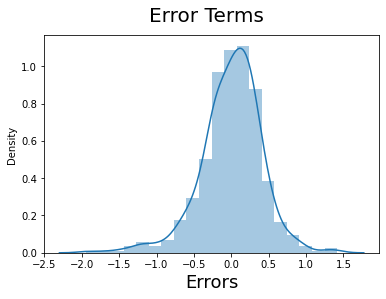

In [964]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### 5.1.6 Making Predictions on the Test Set using the final model

Use the model to Predict the target variable for the Test Data

In [965]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bikeshare_test_df[num_vars] = scaler.transform(bikeshare_test_df[num_vars])

In [966]:
bikeshare_test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.096083,0.094272,-0.081388,-0.043731,0.031073,0.264840,0.246575,0.232877,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,1.035793,1.026916,1.022197,0.942916,0.973536,0.442259,0.432005,0.423633,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,-2.174744,-2.295437,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.809372,-0.792914,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.094973,0.170654,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.983209,0.947998,0.641963,0.485055,0.709202,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.981904,2.205446,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### <font color="red"> Dividing into X_test and y_test </font>

In [967]:
y_test = bikeshare_test_df.pop('cnt')
X_test = bikeshare_test_df

In [968]:
# Adding constant variable to test dataframe
X_test_m12 = sm.add_constant(X_test)

In [970]:
X_test_m12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   atemp         219 non-null    float64
 6   hum           219 non-null    float64
 7   windspeed     219 non-null    float64
 8   summer        219 non-null    uint8  
 9   fall          219 non-null    uint8  
 10  winter        219 non-null    uint8  
 11  feb           219 non-null    uint8  
 12  mar           219 non-null    uint8  
 13  apr           219 non-null    uint8  
 14  may           219 non-null    uint8  
 15  jun           219 non-null    uint8  
 16  jul           219 non-null    uint8  
 17  aug           219 non-null    uint8  
 18  sep           219 non-null   

In [971]:
# Test Data need to retain only the columns from the final model, so first check the columns available in the model
X_train_lm_11.columns

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [972]:
# Creating X_test_m13 dataframe by dropping variables from X_test_m12

X_test_m13 = X_test_m12[['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'weathersit_2',
       'weathersit_3']]

In [973]:
X_test_m13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   atemp         219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   mar           219 non-null    uint8  
 7   apr           219 non-null    uint8  
 8   may           219 non-null    uint8  
 9   jun           219 non-null    uint8  
 10  jul           219 non-null    uint8  
 11  aug           219 non-null    uint8  
 12  sep           219 non-null    uint8  
 13  oct           219 non-null    uint8  
 14  nov           219 non-null    uint8  
 15  dec           219 non-null    uint8  
 16  weathersit_2  219 non-null    uint8  
 17  weathersit_3  219 non-null    uint8  
dtypes: float64(4), int64(2), uint

In [974]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   atemp         510 non-null    float64
 3   hum           510 non-null    float64
 4   windspeed     510 non-null    float64
 5   mar           510 non-null    uint8  
 6   apr           510 non-null    uint8  
 7   may           510 non-null    uint8  
 8   jun           510 non-null    uint8  
 9   jul           510 non-null    uint8  
 10  aug           510 non-null    uint8  
 11  sep           510 non-null    uint8  
 12  oct           510 non-null    uint8  
 13  nov           510 non-null    uint8  
 14  dec           510 non-null    uint8  
 15  weathersit_2  510 non-null    uint8  
 16  weathersit_3  510 non-null    uint8  
dtypes: float64(3), int64(2), uint8(12)
memory usage: 29.9 KB


In [975]:
# Making predictions using the final model

y_pred_m13 = lr_11.predict(X_test_m13)

In [976]:
y_pred_m13.head()

184   -0.568686
535    1.527190
299   -0.434805
221    0.363262
152    0.176356
dtype: float64

### 5.1.7 Model Evaluation

Text(0, 0.5, 'y_pred')

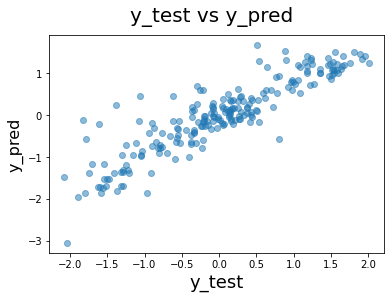

In [977]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m13, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### 5.1.8 R2 Score from the Test Set

In [978]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m13)

0.8021735708089218

## 5.2 Build Model with RFE  [ <font color="blue"> Model 2 </font> ]

### Split the Data in to Training set and Testing set with 70% and 30% accordingly. 

In [1072]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikeshare_train_rfe_df, bikeshare_test_rfe_df = train_test_split(bikeshare_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1075]:
from sklearn.preprocessing import StandardScaler

In [1076]:
rfescaler = StandardScaler()

### Rescaling the Features in the Training Data set using Normalisation method [ MinMaxScaler ]

In [1077]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bikeshare_train_rfe_df[num_vars] = rfescaler.fit_transform(bikeshare_train_rfe_df[num_vars])

In [1078]:
bikeshare_train_rfe_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,weathersit_2,weathersit_3
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,1.562685,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,1.399629,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,-0.215554,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,-1.379511,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,-0.136589,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [1079]:
bikeshare_train_rfe_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,-2.757054e-16,4.193813e-16,-3.459107e-16,-2.333645e-16,-5.398732e-17,0.245098,0.262745,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.430568,0.440557,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,-2.381246e+00,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### <font color="red"> Dividing into X_test and y_test </font>

In [1080]:
y_train_rfe = bikeshare_train_rfe_df.pop('cnt')
X_train_rfe = bikeshare_train_rfe_df

### 5.2.1 Recursive Feature Elimination [ RFE ]

Do the Variables/ Features selection using the Recursive Features Elimination [ RFE ]

In [1081]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1082]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train_rfe, y_train_rfe)
rfe = RFE(lm, step =10)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train_rfe)

In [1083]:
# Print the variables with the Rankings

list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', False, 3),
 ('windspeed', False, 3),
 ('summer', True, 1),
 ('fall', False, 3),
 ('winter', True, 1),
 ('feb', False, 3),
 ('mar', False, 2),
 ('apr', False, 3),
 ('may', False, 2),
 ('jun', False, 3),
 ('jul', False, 3),
 ('aug', False, 2),
 ('sep', True, 1),
 ('oct', False, 2),
 ('nov', False, 3),
 ('dec', False, 3),
 ('mon', True, 1),
 ('tue', True, 1),
 ('wed', True, 1),
 ('thu', True, 1),
 ('fri', True, 1),
 ('sat', False, 2),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [1084]:
# Take all the variables that are suggested by RFE

col = X_train_rfe.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'summer', 'winter', 'sep', 'mon',
       'tue', 'wed', 'thu', 'fri', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [1085]:
X_train_rfe.columns[~rfe.support_]

Index(['atemp', 'hum', 'windspeed', 'fall', 'feb', 'mar', 'apr', 'may', 'jun',
       'jul', 'aug', 'oct', 'nov', 'dec', 'sat'],
      dtype='object')

In [1086]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_con = X_train_rfe[col]

### 5.2.2 Create Model with features selected from RFE

Once we have a list of variables, create a model with those variable and check the p-values and VIF

In [1087]:
X_train_rfe_con = sm.add_constant(X_train_rfe_con)

In [1088]:
lm = sm.OLS(y_train_rfe,X_train_rfe_con).fit()   # Running the linear model

### <font color=red> Check p-values are less than 0.05 </font>

In [1091]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          8.73e-176
Time:                        14:31:08   Log-Likelihood:                -284.87
No. Observations:                 510   AIC:                             597.7
Df Residuals:                     496   BIC:                             657.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6937      0.046    -14.946   

###  <font color=red> Check VIF is less than 5.00 </font>

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### <font color=red>  $ VIF_i = \frac{1}{1 - {R_i}^2} $ </font>

In [1092]:
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe_con.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe_con.values, i) for i in range(X_train_rfe_con.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
2,holiday,inf
3,workingday,inf
8,mon,inf
9,tue,inf
10,wed,inf
11,thu,inf
12,fri,inf
0,const,5.97
6,winter,1.19
5,summer,1.18


### 5.2.3 Remove features to create an optimal Model 

Remove features one by one such that the p-value for all the variables are less than 0.05 and VIF of all variables are less than 5.00

####  <font color=red> Dropping feature `fri` as it has  `p-value: 0.710` and  `VIF: inf`.   </font>

In [1093]:
# Back up of X_train dataset before removing each variable
X_train_rfe_temp_1 = X_train_rfe_con
X_train_rfe_con = X_train_rfe_con.drop('fri', 1,)

In [1094]:
# Build a 2nd fitted model
X_train_rfe_lm_2 = sm.add_constant(X_train_rfe_con)
lr_rfe_2 = sm.OLS(y_train_rfe, X_train_rfe_lm_2).fit()
print(lr_rfe_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          8.73e-176
Time:                        14:32:47   Log-Likelihood:                -284.87
No. Observations:                 510   AIC:                             597.7
Df Residuals:                     496   BIC:                             657.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6937      0.046    -14.946   

In [1095]:
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe_con.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe_con.values, i) for i in range(X_train_rfe_con.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
0,const,5.97
3,workingday,2.48
8,mon,1.95
10,wed,1.92
11,thu,1.80
9,tue,1.77
2,holiday,1.35
6,winter,1.19
5,summer,1.18
4,temp,1.15


####  <font color=red> Dropping feature `wed` as it has  `p-value: 0.590` .   </font>

In [1096]:
# Back up of X_train dataset before removing each variable
X_train_rfe_temp_2 = X_train_rfe_con
X_train_rfe_con = X_train_rfe_con.drop('wed', 1,)

In [1097]:
# Build a third fitted model
X_train_rfe_lm_3 = sm.add_constant(X_train_rfe_con)
lr_rfe_3 = sm.OLS(y_train_rfe, X_train_rfe_lm_3).fit()
print(lr_rfe_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     189.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          7.17e-177
Time:                        14:33:45   Log-Likelihood:                -285.02
No. Observations:                 510   AIC:                             596.0
Df Residuals:                     497   BIC:                             651.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6933      0.046    -14.950   

In [1098]:
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe_con.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe_con.values, i) for i in range(X_train_rfe_con.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
0,const,5.97
3,workingday,1.51
8,mon,1.39
10,thu,1.28
9,tue,1.27
2,holiday,1.25
6,winter,1.19
5,summer,1.18
4,temp,1.15
7,sep,1.10


####  <font color=red> Dropping feature `thu` as it has  `p-value: 0.634` .   </font>

In [1099]:
# Back up of X_train dataset before removing each variable
X_train_rfe_temp_3 = X_train_rfe_con
X_train_rfe_con = X_train_rfe_con.drop('thu', 1,)

In [1102]:
# Build a 4th fitted model
X_train_rfe_lm_4 = sm.add_constant(X_train_rfe_con)
lr_rfe_3 = sm.OLS(y_train_rfe, X_train_rfe_lm_4).fit()
print(lr_rfe_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     185.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.50e-168
Time:                        14:36:05   Log-Likelihood:                 454.86
No. Observations:                 510   AIC:                            -885.7
Df Residuals:                     498   BIC:                            -834.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2624      0.029      8.933   

In [1103]:
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe_con.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe_con.values, i) for i in range(X_train_rfe_con.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
0,const,5.97
3,workingday,1.27
8,mon,1.24
2,holiday,1.21
6,winter,1.19
5,summer,1.18
4,temp,1.15
9,tue,1.15
7,sep,1.10
10,weathersit_2,1.04


####  <font color=red> Dropping feature `holiday` as it has  `p-value: 0.417` .   </font>

In [1104]:
# Back up of X_train dataset before removing each variable
X_train_rfe_temp_4 = X_train_rfe_con
X_train_rfe_con = X_train_rfe_con.drop('holiday', 1,)

In [1105]:
# Build a 5th fitted model
X_train_rfe_lm_5 = sm.add_constant(X_train_rfe_con)
lr_rfe_5 = sm.OLS(y_train_rfe, X_train_rfe_lm_5).fit()
print(lr_rfe_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          9.34e-178
Time:                        14:36:29   Log-Likelihood:                -288.51
No. Observations:                 510   AIC:                             599.0
Df Residuals:                     499   BIC:                             645.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7197      0.045    -15.829   

In [1106]:
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe_con.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe_con.values, i) for i in range(X_train_rfe_con.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
0,const,5.68
5,winter,1.19
4,summer,1.18
2,workingday,1.15
3,temp,1.15
8,tue,1.14
6,sep,1.10
7,mon,1.09
9,weathersit_2,1.04
10,weathersit_3,1.04


####  <font color=red> Dropping feature `tue` as it has  `p-value: 0.160` .   </font>

In [1107]:
# Back up of X_train dataset before removing each variable
X_train_rfe_temp_5 = X_train_rfe_con
X_train_rfe_con = X_train_rfe_con.drop('tue', 1,)

In [1108]:
# Build a third fitted model
X_train_rfe_lm_6 = sm.add_constant(X_train_rfe_con)
lr_rfe_6 = sm.OLS(y_train_rfe, X_train_rfe_lm_6).fit()
print(lr_rfe_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     249.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.54e-178
Time:                        14:41:41   Log-Likelihood:                -289.51
No. Observations:                 510   AIC:                             599.0
Df Residuals:                     500   BIC:                             641.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7208      0.046    -15.840   

In [1109]:
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe_con.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe_con.values, i) for i in range(X_train_rfe_con.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif

,Features,VIF
0,const,5.68
5,winter,1.19
4,summer,1.18
3,temp,1.15
6,sep,1.10
2,workingday,1.04
7,mon,1.04
8,weathersit_2,1.04
9,weathersit_3,1.04
1,yr,1.02


####  <font color=red> Now we have a model with all features having `p-value` less than `0.05` and `VIF` less than `5.00` Let's use this model to predict the test data </font>

In [1110]:
X_train_rfe_lm_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   yr            510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   summer        510 non-null    uint8  
 5   winter        510 non-null    uint8  
 6   sep           510 non-null    uint8  
 7   mon           510 non-null    uint8  
 8   weathersit_2  510 non-null    uint8  
 9   weathersit_3  510 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 22.9 KB


### 5.2.4 Residual Analysis on the train data

Do the Residual analysis and check if there is a normalised curve on errors

In [1112]:
y_train_rfe_cnt = lr_rfe_6.predict(X_train_rfe_lm_6)

Text(0.5, 0, 'Errors')

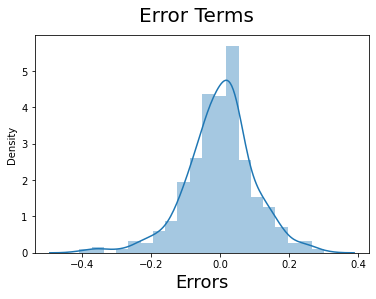

In [1041]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_rfe - y_train_rfe_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### 5.2.5 Making Predictions on the Test Set using the final model

Use the model to Predict the target variable for the Test Data

In [1113]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bikeshare_test_rfe_df[num_vars] = rfescaler.transform(bikeshare_test_rfe_df[num_vars])

In [1114]:
bikeshare_test_rfe_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.096083,0.094272,-0.081388,-0.043731,0.031073,0.264840,0.246575,0.232877,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,1.035793,1.026916,1.022197,0.942916,0.973536,0.442259,0.432005,0.423633,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,-2.174744,-2.295437,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.809372,-0.792914,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.094973,0.170654,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.983209,0.947998,0.641963,0.485055,0.709202,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.981904,2.205446,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### <font color="red"> Dividing into X_test and y_test </font>

In [1115]:
y_test_rfe = bikeshare_test_rfe_df.pop('cnt')
X_test_rfe = bikeshare_test_rfe_df

In [1116]:
# Adding constant variable to test dataframe
X_test_rfe_m8 = sm.add_constant(X_test_rfe)

In [1117]:
# Creating X_test_m12 dataframe by dropping variables from X_test_m12

X_test_rfe_m8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   atemp         219 non-null    float64
 6   hum           219 non-null    float64
 7   windspeed     219 non-null    float64
 8   summer        219 non-null    uint8  
 9   fall          219 non-null    uint8  
 10  winter        219 non-null    uint8  
 11  feb           219 non-null    uint8  
 12  mar           219 non-null    uint8  
 13  apr           219 non-null    uint8  
 14  may           219 non-null    uint8  
 15  jun           219 non-null    uint8  
 16  jul           219 non-null    uint8  
 17  aug           219 non-null    uint8  
 18  sep           219 non-null   

In [1118]:
X_train_rfe_con.columns

Index(['const', 'yr', 'workingday', 'temp', 'summer', 'winter', 'sep', 'mon',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [1122]:
X_test_rfe_lm_8 = X_test_rfe_m8[['const', 'yr', 'workingday', 'temp', 'summer', 'winter', 'sep', 'mon',
       'weathersit_2', 'weathersit_3']]

In [1123]:
X_test_rfe_lm_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   summer        219 non-null    uint8  
 5   winter        219 non-null    uint8  
 6   sep           219 non-null    uint8  
 7   mon           219 non-null    uint8  
 8   weathersit_2  219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 9.8 KB


In [1121]:
X_train_rfe_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   yr            510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   summer        510 non-null    uint8  
 5   winter        510 non-null    uint8  
 6   sep           510 non-null    uint8  
 7   mon           510 non-null    uint8  
 8   weathersit_2  510 non-null    uint8  
 9   weathersit_3  510 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 22.9 KB


In [1124]:
# Making predictions using the Final model

y_pred_rfe_m8 = lr_rfe_6.predict(X_test_rfe_lm_8)

In [1125]:
y_pred_rfe_m8.shape

(219,)

In [1126]:
y_test_rfe.shape

(219,)

### 5.2.6 Model Evaluation

Text(0, 0.5, 'y_pred')

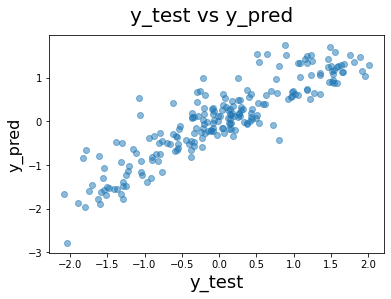

In [1127]:
fig = plt.figure()
plt.scatter(y_test_rfe, y_pred_rfe_m8, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### 5.2.7 R2 Score from the Test Set

In [1128]:
from sklearn.metrics import r2_score
r2_score(y_test_rfe, y_pred_rfe_m8)

0.7999472572018317

## <font color="red"> Model 1 R2 Score for Test Data : 0.8021735708089218 </font>

## <font color="green"> Model 2 R2 Score for Test Data : 0.7999472572018317 </font>

Even though the R2 Score for Model 2 is little lesser than Model 1, we will still go with <font color="green"> <b> Model 2 </b> </font> for our predictions because of the following reasons

1. The number of features in Model 2 is significantly lesser than Model 1 and so the performance is better than the Model 1.

2. Using RFE reduces the significant amount of time spent in selecting the features required for the model, this will be very useful when the data set has more number of features


##  <span style="background-color:green"> <font color="white"> &nbsp; We will use Model 2 for our further prediction </font> </span>